In [4]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Flatten


nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')


In [7]:
df=pd.read_csv("labeled_data.csv")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [8]:
# Lower case all the words of the tweet before any preprocessing
df['tweet'] = df['tweet'].str.lower()

# Removing punctuations present in the text
punctuations_list = string.punctuation
def remove_punctuations(text):
	temp = str.maketrans('', '', punctuations_list)
	return text.translate(temp)

df['tweet']= df['tweet'].apply(lambda x: remove_punctuations(x))
df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolovely as a woman you shouldnt compl...
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad for cuff...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life you eve...
3,3,3,0,2,1,1,rt cganderson vivabased she look like a tranny
4,4,6,0,6,0,1,rt shenikaroberts the shit you hear about me ...


In [9]:
def remove_stopwords(text):
	stop_words = stopwords.words('english')

	imp_words = []

	# Storing the important words
	for word in str(text).split():

		if word not in stop_words:

			# Let's Lemmatize the word as well
			# before appending to the imp_words list.

			lemmatizer = WordNetLemmatizer()
			lemmatizer.lemmatize(word)

			imp_words.append(word)

	output = " ".join(imp_words)

	return output


df['tweet'] = df['tweet'].apply(lambda text: remove_stopwords(text))
df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolovely woman shouldnt complain cleani...
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life ever fuc...
3,3,3,0,2,1,1,rt cganderson vivabased look like tranny
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...


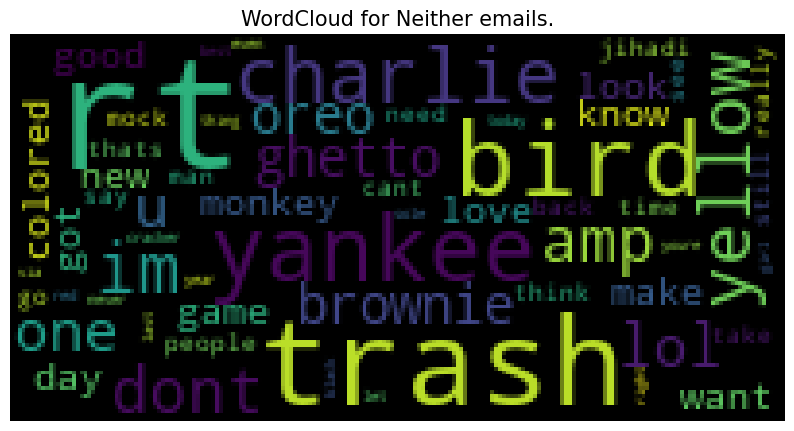

In [10]:
def plot_word_cloud(data, typ):
  # Joining all the tweets to get the corpus
  email_corpus = " ".join(data['tweet'])

  plt.figure(figsize = (10,10))

  # Forming the word cloud
  wc = WordCloud(max_words = 100,
          width = 200,
          height = 100,
          collocations = False).generate(email_corpus)

  # Plotting the wordcloud obtained above
  plt.title(f'WordCloud for {typ} emails.', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()

plot_word_cloud(df[df['class']==2], typ='Neither')


In [11]:
class_2 = df[df['class'] == 2]
class_1 = df[df['class'] == 1].sample(n=3500)
class_0 = df[df['class'] == 0]

balanced_df = pd.concat([class_0, class_0, class_0, class_1, class_2], axis=0)
balanced_df

#0- Hate speech
#1- Offensive language
#2- Neither


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
85,85,3,2,1,0,0,blackman38tide whalelookyhere howdydowdy11 que...
89,90,3,3,0,0,0,cbbaby24 whitethunduh alsarabsss hes beaner sm...
110,111,3,3,0,0,0,devilgrimz vigxrarts youre fucking gay blackli...
184,186,3,3,0,0,0,markroundtreejr lmfaoooo hate black people htt...
202,204,3,2,1,0,0,nochillpaz least im nigger httptcorgja7cfoit l...
...,...,...,...,...,...,...,...
24736,25249,3,0,0,3,2,yaya ho cute avi tho rt vivalaari idea sleep 1...
24737,25250,3,0,1,2,2,yea ntel new friend friends kno theyre allowed...
24767,25280,3,0,1,2,2,know say early bird gets worm puts gummy worms...
24779,25292,3,0,1,2,2,youve gone broke wrong heart baby drove rednec...


In [19]:
features = balanced_df['tweet']
target = balanced_df['class']

X_train, X_val, Y_train, Y_val = train_test_split(features,
												target,
												test_size=0.2,
												random_state=22)
print(X_train.shape, X_val.shape)
print(Y_train.shape,Y_val.shape)

(9562,) (2391,)
(9562,) (2391,)


In [13]:
Y_train = pd.get_dummies(Y_train)
Y_val = pd.get_dummies(Y_val)
Y_train.shape, Y_val.shape
print(Y_train)


           0      1      2
21627  False  False   True
16069   True  False  False
18085   True  False  False
22430  False  False   True
3699    True  False  False
...      ...    ...    ...
12186  False   True  False
20034  False   True  False
4593   False  False   True
22439  False   True  False
19686  False  False   True

[9562 rows x 3 columns]


In [15]:
# training the tokenizer
max_words = 5000
token = Tokenizer(num_words=max_words,
				lower=True,
				split=' ')
token.fit_on_texts(X_train)

#Generating token embeddings
Training_seq = token.texts_to_sequences(X_train)
Training_pad = pad_sequences(Training_seq,
							maxlen=50,
							padding='post',
							truncating='post')

Testing_seq = token.texts_to_sequences(X_val)
Testing_pad = pad_sequences(Testing_seq,
							maxlen=50,
							padding='post',
							truncating='post')
# Need this block to get it to work with TensorFlow 2.x


In [26]:
import numpy as np
Training_pad = np.array(Training_pad)
Training_labels = np.array(Y_train)
Testing_pad = np.array(Testing_pad)
Testing_labels = np.array(Y_val)
Training_pad.shape

(9562, 50)

In [39]:
model = keras.models.Sequential([
	layers.Embedding(max_words, 32, input_length=50),
	layers.Bidirectional(layers.LSTM(16)),
	layers.Dense(512, activation='relu', kernel_regularizer='l1'),
	layers.BatchNormalization(),
	layers.Dropout(0.3),
	layers.Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
			optimizer='adam',
			metrics=['accuracy'])

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 32)            160000    
                                                                 
 bidirectional_5 (Bidirecti  (None, 32)                6272      
 onal)                                                           
                                                                 
 dense_10 (Dense)            (None, 512)               16896     
                                                                 
 batch_normalization_5 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 3)                

In [40]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(patience=3,
				monitor = 'val_accuracy',
				restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
					monitor = 'val_loss',
					factor = 0.5,
					verbose = 0)


In [41]:
tf.config.run_functions_eagerly(True)

In [42]:
history = model.fit(Training_pad,Y_train,
					validation_data=(Testing_pad, Y_val),
					epochs=50,
					verbose=1,
					batch_size=32,
					callbacks=[lr, es])


Epoch 1/50
299/299 [==============================] - 298s 995ms/step - loss: 1.7679 - accuracy: 0.7541 - val_loss: 0.9813 - val_accuracy: 0.6495 - lr: 0.0010
Epoch 2/50
299/299 [==============================] - 264s 884ms/step - loss: 0.3696 - accuracy: 0.9028 - val_loss: 0.4996 - val_accuracy: 0.8670 - lr: 0.0010
Epoch 3/50
299/299 [==============================] - 303s 1s/step - loss: 0.2612 - accuracy: 0.9354 - val_loss: 0.4534 - val_accuracy: 0.8875 - lr: 0.0010
Epoch 4/50
299/299 [==============================] - 299s 997ms/step - loss: 0.2149 - accuracy: 0.9502 - val_loss: 0.5353 - val_accuracy: 0.8519 - lr: 0.0010
Epoch 5/50
299/299 [==============================] - 314s 1s/step - loss: 0.1840 - accuracy: 0.9565 - val_loss: 0.6551 - val_accuracy: 0.8315 - lr: 0.0010
Epoch 6/50
299/299 [==============================] - 335s 1s/step - loss: 0.1205 - accuracy: 0.9768 - val_loss: 0.4916 - val_accuracy: 0.8934 - lr: 5.0000e-04
Epoch 7/50
299/299 [==============================]

In [48]:
import pickle
pickle.dump(token,open("tokenizer.pkl","wb"))
pickle.dump(model,open("hate_speech_model.pkl","wb"))
token_form=pickle.load(open('tokenizer.pkl', 'rb'))
load_model=pickle.load(open('hate_speech_model.pkl', 'rb'))

In [52]:
sent=["Hello"]
seq=token_form.texts_to_sequences(sent)
padded_pred=pad_sequences(seq, maxlen=50, padding='post', truncating='post')
pred_model=load_model.predict(padded_pred)
avg=(pred_model[0][0]+pred_model[0][1]+pred_model[0][2])/3
index=0
for i in pred_model:
  max=0
  for j in list(i):
    if j-avg>max:
      max=j-avg
      index=list(i).index(j)
print(index)




1/1 [==============================] - 1s 551ms/step
2
